# Data Cleaning

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import csv

# Graph plot libraries seaborn, matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Read the csv file
df = pd.read_csv('bank-full.csv', sep=';', engine='python')
df.head(2)

# !echo '"age;"job";"' > test.csv
# !cat test.csv
# df1 = pd.read_csv('test.csv', sep=';', engine='python' )
# df1

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."


### Data Cleaning checks:

1. Unnecessary special characters in column names and values.

    Solution:
    
    For Column_Names -\
    quoting=csv.QUOTE_NONE is used to remove quotes around field names.
    
    For Values -\
    Remove the double quotes using replace method

In [3]:
# For column split
df = pd.read_csv('bank-full.csv', sep=';', engine='python' , quoting=csv.QUOTE_NONE)
df.head(2)

,"""age","""""job""""","""""marital""""","""""education""""","""""default""""","""""balance""""","""""housing""""","""""loan""""","""""contact""""","""""day""""","""""month""""","""""duration""""","""""campaign""""","""""pdays""""","""""previous""""","""""poutcome""""","""""y"""""""
0,"""58","""""management""""","""""married""""","""""tertiary""""","""""no""""",2143,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",261,1,-1,0,"""""unknown""""","""""no"""""""
1,"""44","""""technician""""","""""single""""","""""secondary""""","""""no""""",29,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",151,1,-1,0,"""""unknown""""","""""no"""""""


#### Remove special chars from column name 

In [4]:
df_column_names=df.columns.str.replace("\"\"",'')
df_column_names = df_column_names.to_list()
df_column_names[0] = df_column_names[0].replace('\"','')
df_column_names[-1] = df_column_names[-1].replace('\"','')

# Rename the cols
df.columns  = df_column_names
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


#### Remove special chars from values

In [5]:
# Removing unrequired quotes
df = df.replace('"', '', regex=True)
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Table Size

In [7]:
df.shape

(45211, 17)

#### check datatypes

In [8]:
df.dtypes

age          object
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

#### Correcting datatype anomalies

In [9]:
# Changing object dtype to category for better memory usage
Categorical_features = ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'day',
                       'month', 'poutcome', 'y', 'age']
Numerical_features = ['duration', 'campaign', 'pdays', 'previous', 'balance']

In [10]:
df[Categorical_features]=df[Categorical_features].astype('category')

In [11]:
df.dtypes

age          category
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day          category
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

#### Describe and check

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  category
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  category
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(12), int64(5)
memory usage: 2.2 MB


In [13]:
# Only for Numerical Features
df.describe()

,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,258.163080,2.763841,40.197828,0.580323
std,3044.765829,257.527812,3.098021,100.128746,2.303441
min,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
# For all columns
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.0,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,77,12,3,4,2,NaN,2,2,3,31.0,12,NaN,NaN,NaN,NaN,4,2
top,32,blue-collar,married,secondary,no,NaN,yes,no,cellular,20.0,may,NaN,NaN,NaN,NaN,unknown,no
freq,2085,9732,27214,23202,44396,NaN,25130,37967,29285,2752.0,13766,NaN,NaN,NaN,NaN,36959,39922
mean,NaN,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,NaN,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,NaN,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


#### Find unique entries for categorical features

In [15]:
series_of_type_per_column = df.dtypes
for col,col_type in series_of_type_per_column.iteritems():
    if df[col].dtype.name == 'category':
        print(f'''{col} has {df[col].nunique()} unique entries = {df[col].unique()}\n''')

age has 77 unique entries = ['58', '44', '33', '47', '35', ..., '84', '87', '92', '93', '88']
Length: 77
Categories (77, object): ['18', '19', '20', '21', ..., '92', '93', '94', '95']

job has 12 unique entries = ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', ..., 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']

marital has 3 unique entries = ['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']

education has 4 unique entries = ['tertiary', 'secondary', 'unknown', 'primary']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']

default has 2 unique entries = ['no', 'yes']
Categories (2, object): ['no', 'yes']

housing has 2 unique entries = ['yes', 'no']
Categories (2, object): ['no', 'yes']

loan has 2 unique entries = ['no', 'yes']
Categorie

#### Check empty columns and unnecessary data

Solution: No Column data is empty 

#### Check if any columns have same row data?

In [16]:
for this_column in df.columns:
       print(f'{df[this_column].head(1)} has {df[this_column].nunique()} unique entries')

0    58
Name: age, dtype: category
Categories (77, object): ['18', '19', '20', '21', ..., '92', '93', '94', '95'] has 77 unique entries
0    management
Name: job, dtype: category
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown'] has 12 unique entries
0    married
Name: marital, dtype: category
Categories (3, object): ['divorced', 'married', 'single'] has 3 unique entries
0    tertiary
Name: education, dtype: category
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown'] has 4 unique entries
0    no
Name: default, dtype: category
Categories (2, object): ['no', 'yes'] has 2 unique entries
0    2143
Name: balance, dtype: int64 has 7168 unique entries
0    yes
Name: housing, dtype: category
Categories (2, object): ['no', 'yes'] has 2 unique entries
0    no
Name: loan, dtype: category
Categories (2, object): ['no', 'yes'] has 2 unique entries
0    unknown
Name: contact, dtype: category
Cat

#### Analysis:

No columns has same row data

#### Check Null count for each coulmn data

In [17]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Analysis

No null data

#### Drop columns that are not useful

In [18]:
#Explain: 

df.isnull().sum()==df.shape[0]

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

#### Analysis

All columns have data hence no need to drop.

#### check quantity of data

In [19]:
df.isnull().sum()/len(df)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

#### Analysis

100% data is present.

## Data Cleaning Report 

1. Correcting datatype anomalies
    * Converting object type to category for better memory usage
    * Divded numercial and categorical dtypes correctly
2. Describe and check the continous variables data count, mean, std, min, max, and percentile values.
    * All Data looks good!
3. Find unique entries for categorical features
    * Check the category numbers and value names for better understanding.\
    Note: We could eliminate the column if only one category is present.
4. Check empty columns and unnecessary data
    * No empty columns are present and data looks good!
5. Check if any columns have same row data
    * No colums has same row data. 
6.  Check Null count for each coulmn data
    * No Null values found
7. Drop columns that are not useful
    * All columns are useful

## Sanity checks 

In [20]:
df.corr()

,balance,duration,campaign,pdays,previous
balance,1.000000,0.021560,-0.014578,0.003435,0.016674
duration,0.021560,1.000000,-0.084570,-0.001565,0.001203
campaign,-0.014578,-0.084570,1.000000,-0.088628,-0.032855
pdays,0.003435,-0.001565,-0.088628,1.000000,0.454820
previous,0.016674,0.001203,-0.032855,0.454820,1.000000


In [21]:
df.groupby(['education','job'])['balance'].mean()

education  job          
primary    admin.            930.478469
           blue-collar      1086.104311
           entrepreneur     1679.366120
           housemaid        1128.261563
           management       1672.244898
           retired          1879.545912
           self-employed    1330.723077
           services          966.571014
           student          1243.522727
           technician       1487.221519
           unemployed       1588.190661
           unknown          1750.254902
secondary  admin.           1116.059967
           blue-collar      1063.894433
           entrepreneur     1070.841328
           housemaid        1443.589873
           management       1326.537021
           retired          2061.122967
           self-employed    1287.029463
           services          957.864623
           student          1259.903543
           technician       1124.722700
           unemployed       1432.729396
           unknown          1249.521127
tertiary   admi

In [22]:
df.describe()

,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,258.163080,2.763841,40.197828,0.580323
std,3044.765829,257.527812,3.098021,100.128746,2.303441
min,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,102127.000000,4918.000000,63.000000,871.000000,275.000000


## Sanity checks Report

1. Check the corelation between each continous columns.
2. Check the relation between education, job and balance.
3. Describe and check the continous variables data count, mean, std, min, max, and percentile values.
    * All Data looks good!\

Overall Data looks good and we can proceed ahead!!!

## Analysis of clean data for characteristics & Visualization

In [23]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#### Sec 1:

In [24]:
# duaration unit = seconds
df.groupby(['y'])['duration'].mean()

y
no     221.182806
yes    537.294574
Name: duration, dtype: float64

Analysis:
   * The average seconds spent on clients who agreed to take up the plan was 537s and with others they have spent on 221s on avearge.

#### Sec 2

In [25]:
df.groupby(['y','marital','loan', 'housing'])['balance'].mean()

y    marital   loan  housing
no   divorced  no    no         1355.066840
                     yes        1085.634703
               yes   no          735.559585
                     yes         697.457265
     married   no    no         1800.402079
                     yes        1260.276812
               yes   no          776.759470
                     yes         847.864220
     single    no    no         1487.449937
                     yes        1220.023346
               yes   no          611.309593
                     yes         653.390097
yes  divorced  no    no         2116.014793
                     yes        1368.741935
               yes   no          743.914286
                     yes         752.718750
     married   no    no         2197.492992
                     yes        1651.746445
               yes   no         1262.238095
                     yes         880.981818
     single    no    no         1876.943772
                     yes        1531.942529
   

Analysis:
   * The clients who has high average deposit of 2116.014793 & divorced & no loan & no housing are more likely to take up the term deposit plan. 

#### Sec 3

Text(0.5, 6.79999999999999, 'age in years')

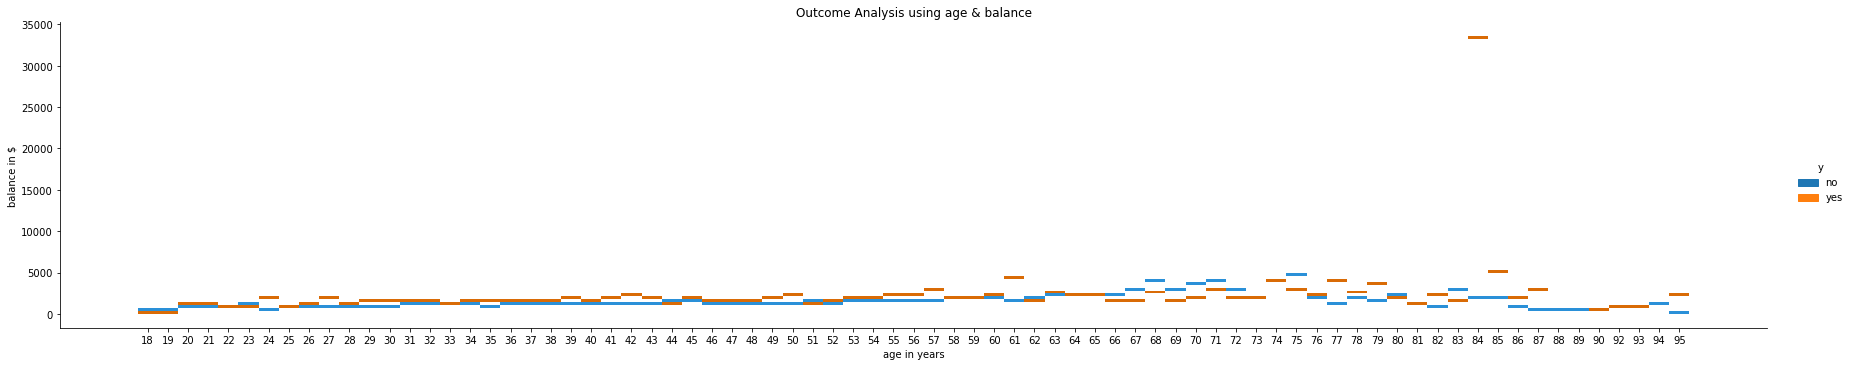

In [26]:
# perform groupby
df_1 = df.groupby(['age','y'])['balance'].mean()
df_1 = df_1.reset_index()
  
# plot barplot
sns.displot(x="age",
           y="balance",
           hue="y",
           kind='hist',
           data=df_1, aspect=5)
plt.title('Outcome Analysis using age & balance')
plt.ylabel('balance in $')
plt.xlabel('age in years')

Analysis:
   * The clients who had balance more than $10,000 were least interested in term deposit plan.

#### Sec 4

Text(0.5, 1.0, 'Relation between job and balace')

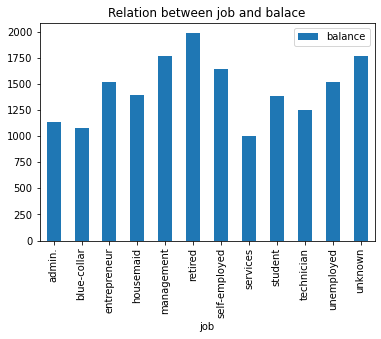

In [27]:
vis=df.groupby(['job'])['balance'].mean()
vis=pd.DataFrame(vis)
vis.plot(kind='bar')
plt.title('Relation between job and balace')

Analysis:
   * The clients who are into services have lowest balance and retired people has highest.

#### Sec 5

Text(0.5, 6.79999999999999, 'Job Type')

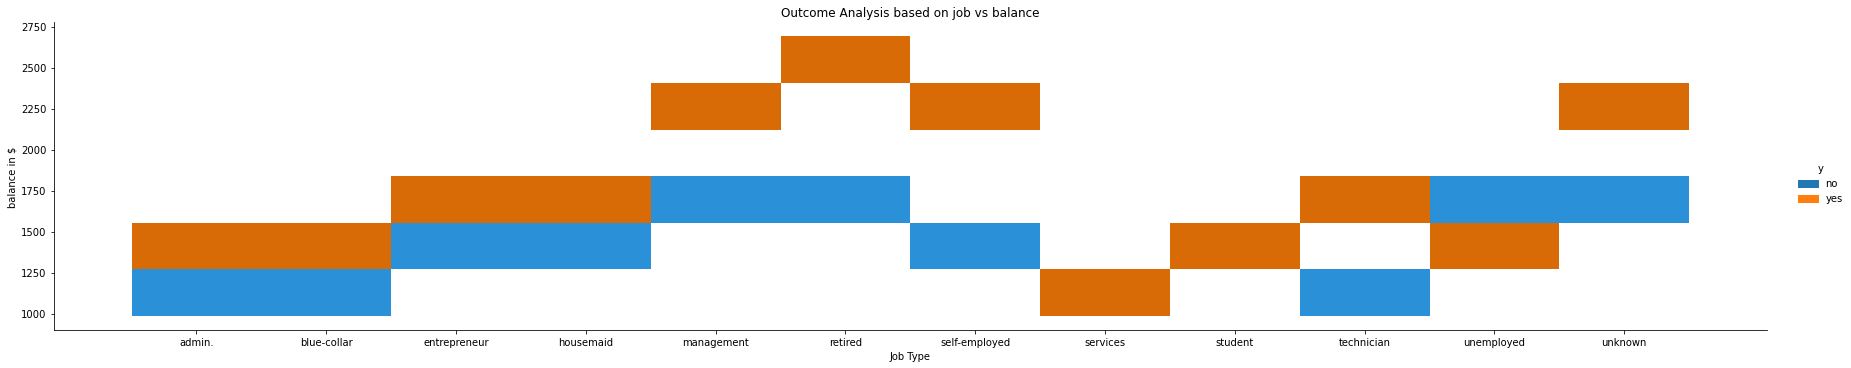

In [32]:
import seaborn as sns
#sns.displot(x=df['job'],y=df['y'],aspect=3)

df_outcome=df.groupby(['job','y'])['balance'].mean()
df_outcome=df_outcome.reset_index()


# plot barplot
sns.displot(x="job",
           y="balance",
           hue="y",
           data=df_outcome, aspect=5)
plt.title('Outcome Analysis based on job vs balance')
plt.ylabel('balance in $')
plt.xlabel('Job Type')

Analysis:
   * The clients with hightest balance with each job type are willing to take up the term deposit plan.

## Summary 

### Patterns observed 

#### Sec 1:
  
Analysis:
   * The average seconds spent on clients who agreed to take up the plan was 537s and with others they have spent on 221s on avearge.
   
#### Sec 2:

Analysis:

   * The clients who have high average deposit & divorced & no loan & no housing are more likely to take up the term deposit plan.
   
#### Sec 3:

Analysis:
   * The clients who have balance more than $10,000 were least interested in term deposit plan.
   
#### Sec 4:
   
Analysis:
   * The clients who are into services job has the lowest balance and retired people has highest.
   
#### Sec 5:

Analysis:
   * The clients with highest balance with each job type are willing to take up the term deposit plan.

### Primary Observation

In [48]:
#12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#14 - previous: number of contacts performed before this campaign and for this client (numeric)

df.groupby('y').get_group('yes').mean()

/var/folders/wb/mynt_v_579n87q8ddq2_5w300000gn/T/ipykernel_20801/620370527.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.groupby('y').get_group('yes').mean()


balance     1804.267915
duration     537.294574
campaign       2.141047
pdays         68.702968
previous       1.170354
dtype: float64

In [49]:
df.groupby('y').get_group('no').mean(numeric_only=None)

/var/folders/wb/mynt_v_579n87q8ddq2_5w300000gn/T/ipykernel_20801/389258055.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.groupby('y').get_group('no').mean(numeric_only=None)


balance     1303.714969
duration     221.182806
campaign       2.846350
pdays         36.421372
previous       0.502154
dtype: float64

Analysis:
    The customers who were contacted multiple times before campaign and whose balance is high were willing to take up the term deposit.